# Logistic Regression for Imbalanced Classification

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,-0.005025,0.030928,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,-0.029925,0.047619,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0.002387,0.034063,0,1,0,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0.011820,0.028986,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0.026190,0.044444,0,0,1,-0.021531


In [4]:
X = dataset[['Open', 'High', 'Low', 'Volume', 'Adj Close','Returns']].values
y = dataset['Buy_Sell'].values

In [5]:
counter = Counter(y)
print(counter)

Counter({0: 631, 1: 626})


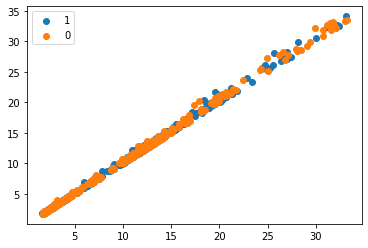

In [6]:
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.480
